In [373]:
from music21 import *
from copy import deepcopy

# Set the path to MuseScore manually
environment.set('musescoreDirectPNGPath', r'C:\Program Files\MuseScore 4\bin\MuseScore4.exe')  # Update the path accordingly

def progression_parser(chord_progression, durations, time_signature, key_signature, tempo):
    # Create a stream object to hold the chord progression
    progression = stream.Stream()

    # Insert the time signature, key signature, and tempo into the progression
    progression.insert(0, time_signature)
    progression.insert(0, key_signature)
    progression.insert(0, tempo)

    for i in range(len(durations)):
        if chord_progression[i] != [""]:
            c = chord.Chord(chord_progression[i])
        else:
            c = note.Rest()
        c.duration = duration.Duration(durations[i])  # Assign the duration directly
        progression.append(c)

    return progression

def generate_chord_progression(roman_numerals, root_notes, inversions, durations, time_signature, tempo, key_signature):
    # Create a stream object to hold the chord progression
    progression = stream.Stream()

    # Insert the time signature, key signature, and tempo into the progression
    progression.insert(0, time_signature)
    progression.insert(0, key_signature)
    progression.insert(0, tempo)

    # Add chords to the progression
    for roman_numeral, root_note, inversion, duration_value in zip(roman_numerals, root_notes, inversions, durations):
        chord_symbol = roman.RomanNumeral(roman_numeral)
        chord_symbol.duration = duration.Duration(duration_value)
        chord_symbol.addLyric(root_note)
        chord_symbol.inversion(inversion)
        progression.append(chord_symbol)

    return progression

def transpose(progression, steps):
    original_key = progression.analyze('key')

    def transpose_chord(chord, interval_value):
        # Transpose the chord by the given interval value
        for note in chord:
            note.transpose(interval.Interval(interval_value), inPlace=True)

    # Transpose the chord progression to the new key
    transposed_progression = deepcopy(progression)
    for chord in transposed_progression.getElementsByClass('Chord'):
        transpose_chord(chord, steps)  # Transpose to the new key

    # Show and play the transposed progression
    print(f"Transposed from {original_key} to {transposed_progression.analyze('key')} (Key signature does NOT change!):")

    return transposed_progression

def octave(chord,direction):  
    # Function to transpose a single note down by one octave
    def transpose_note_down_octave(note):
        # Extract the pitch and octave from the note
        pitch = note[:-1]
        octave = int(note[-1])
        
        # Decrease the octave
        new_octave = octave - 1
        
        # Return the transposed note as a string
        return f"{pitch}{new_octave}"
    
    # Function to transpose a single note up by one octave
    def transpose_note_up_octave(note):
        # Extract the pitch and octave from the note
        pitch = note[:-1]
        octave = int(note[-1])
        
        # Increase the octave
        new_octave = octave + 1
        
        # Return the transposed note as a string
        return f"{pitch}{new_octave}"

    if direction == 'down':
        # Apply the octave transposition to each note in the tuple
        transposed_chord = tuple(transpose_note_down_octave(note) for note in chord)
    if direction == 'up':
        # Apply the octave transposition to each note in the tuple
        transposed_chord = tuple(transpose_note_up_octave(note) for note in chord)
        
    return transposed_chord

def play(melody):
    # Play the melody
    sp = midi.realtime.StreamPlayer(melody)
    sp.play()

def show(melody):
    # Show the melody in staff notation
    melody.show()
    
if 0: # Enable Examples
    print('Generating Chord progression from Roman Numerals')
    progression_c_major = generate_chord_progression(
        roman_numerals=['I', 'IV', 'V', 'vi'],
        root_notes=roman_numerals,
        inversions=[0, 0, 1, 0],
        durations=[1, 1, 1, 1],
        time_signature=meter.TimeSignature('4/4'),
        tempo=tempo.MetronomeMark(number=60),
        key_signature=key.KeySignature(0)  # C major
    )
    show(progression_c_major)
    play(progression_c_major)

    print('Generating Chord progression from Explicit Creation')
    progression = progression_parser(
        chord_progression =  [
            ["C4","E4","G4"],
            ["F4","A4","C5"],
            ["B4","D5","G5"],
            ["A4","C5","E5"], 
            [""],        
                        ],
        durations = [1,1,1,1,1],
        time_signature=meter.TimeSignature('4/4'),
        tempo=tempo.MetronomeMark(number=60),
        key_signature=key.KeySignature(0)  # C major
    )

    progression.show()
    play(progression)


    print('Demonstrating Transposion')
    transposed_progression = transpose(progression, steps = 7)
    show(transposed_progression)
    play(transposed_progression)

''' End of Functions '''

' End of Functions '

In [384]:
''' Standard Chords '''

# C major (I)
I = ('C3', 'E3', 'G3')  # Root
I6 = ('E3', 'G3', 'C4')  # First inversion
I64 = ('G3', 'C4', 'E4')  # Second inversion

# C minor (i)
i = ('C3', 'Eb3', 'G3')  # Root
i6 = ('Eb3', 'G3', 'C4')  # First inversion
i64 = ('G2', 'C3', 'Eb3')  # Second inversion

# D minor (ii)
ii = ('D3', 'F3', 'A3')  # Root
ii6 = ('F3', 'A3', 'D4')  # First inversion
ii64 = ('A3', 'D4', 'F4')  # Second inversion

# E minor (iii)
iii = ('E3', 'G3', 'B3')  # Root
iii6 = ('G3', 'B3', 'E4')  # First inversion
iii64 = ('B3', 'E4', 'G4')  # Second inversion

# E major (III)
III = ('E3', 'G#3', 'B3')  # Root
III6 = ('G#3', 'B3', 'E4')  # First inversion
III64 = ('B3', 'E4', 'G#4')  # Second inversion

# F minor (iv)
iv = ('F3', 'Ab3', 'C4')  # Root
iv6 = ('Ab3', 'C4', 'F4')  # First inversion
iv64 = ('C4', 'F4', 'Ab4')  # Second inversion

# F major (IV)
IV = ('F3', 'A3', 'C4')  # Root
IV6 = ('A3', 'C4', 'F4')  # First inversion
IV64 = ('C4', 'F4', 'A4')  # Second inversion

# G major (V)
V = ('G3', 'B3', 'D4')  # Root
V6 = ('B3', 'D4', 'G4')  # First inversion
V64 = ('D4', 'G4', 'B4')  # Second inversion

# G major (V7)
V7 = ('G3', 'B3', 'D4', 'F4')  # Root Position
V65 = ('B3', 'D4', 'F4', 'G4')  # First Inversion
V43 = ('D4', 'F4', 'G4', 'B4')  # Second Inversion
V42 = ('F3', 'G3', 'B3', 'D4')  # Third Inversion

# A minor (vi)
vi = ('A3', 'C4', 'E4')  # Root
vi6 = ('C4', 'E4', 'A4')  # First inversion
vi64 = ('E4', 'A4', 'C5')  # Second inversion

# B Diminished (vii°)
viio = ('B3', 'D4', 'F4')       # Root Position
viio6 = ('D4', 'F4', 'B4')       # First Inversion
viio64 = ('F3', 'B3', 'D4')       # Second Inversion

''' Special Chords '''

# Neapolitan chord (♭II) - D♭ Major in C Major
N = ('Db3', 'F3', 'Ab3')  # Root Position
N6 =('F3', 'Ab3', 'Db4')  # First Inversion
N64 = ('Ab2', 'Db3', 'F3')   # Second Inversion

In [385]:
''' Cadences '''

plagal_cadence = [ IV, I ]

partial_authentic_cadence = [ V6, I ]

full_authentic_cadence = [ V, I ]

half_cadence = [ I, IV, ii, V ] # Also called imperfect cadence

deceptive_cadence = [ V, vi ] # Also called interrupted cadence

''' Progressions '''

neapolitan_0 = [i, N6, octave(i64,'up'), V7, octave(I,'up')] # Got this one from Reddit

cute_0 = [I64, IV6, V7, vi , I64, IV6, V7, octave(I,'up')+('G3',)]

''' Songs '''

' Songs '

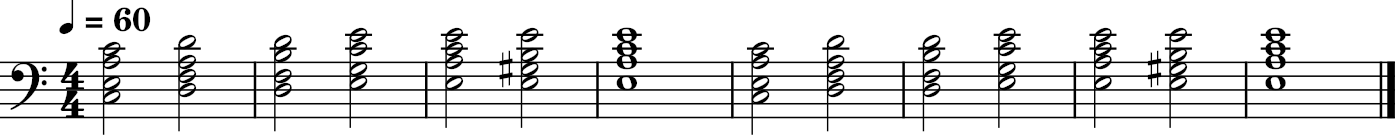

In [391]:
voia_ta = [
    ('C3', 'E3', 'A3', 'C4'),
    ('D3', 'F3', 'A3', 'D4'),
    ('D3', 'F3', 'B3', 'D4'),
    ('E3', 'G3', 'C4', 'E4'),
    ('E3', 'A3', 'C4', 'E4'),
    ('E3', 'G#3', 'B3', 'E4'),
    ('E3', 'A3', 'C4', 'E4'),

    ('C3', 'E3', 'A3', 'C4'),
    ('D3', 'F3', 'A3', 'D4'),
    ('D3', 'F3', 'B3', 'D4'),
    ('E3', 'G3', 'C4', 'E4'),
    ('E3', 'A3', 'C4', 'E4'),
    ('E3', 'G#3', 'B3', 'E4'),
    ('E3', 'A3', 'C4', 'E4'),
]

chord_progression = voia_ta
durations = [2]*len(chord_progression)
durations[6] = 4
durations[-1] = 4
progression = progression_parser(
    chord_progression = chord_progression,
    durations = durations,
    time_signature=meter.TimeSignature('4/4'),
    tempo=tempo.MetronomeMark(number=60),
    key_signature=key.KeySignature(0)  # C major
)

progression.show()
play(progression)